In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [4]:
data = pd.read_csv("bank-additional-full.csv",sep=';')

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [7]:
data.shape

(41188, 21)

In [8]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
print(f'job:{data["job"].unique()}')
print(f'marital:{data["marital"].unique()}')
print(f'education:{data["education"].unique()}')
print(f'default:{data["default"].unique()}')
print(f'housing:{data["housing"].unique()}')
print(f'contact:{data["contact"].unique()}')
print(f'month:{data["month"].unique()}')
print(f'day_of_week:{data["day_of_week"].unique()}')
print(f'poutcome:{data["poutcome"].unique()}')      
print(f'y:{data["y"].unique()}')

job:['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital:['married' 'single' 'divorced' 'unknown']
education:['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default:['no' 'unknown' 'yes']
housing:['no' 'yes' 'unknown']
contact:['telephone' 'cellular']
month:['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week:['mon' 'tue' 'wed' 'thu' 'fri']
poutcome:['nonexistent' 'failure' 'success']
y:['no' 'yes']


# Univariate Analysis

no     36548
yes     4640
Name: y, dtype: int64


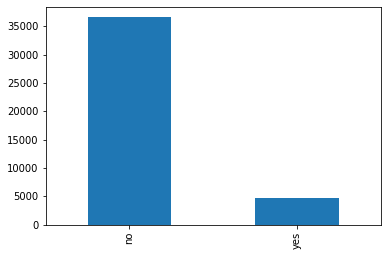

In [11]:
#Term deposite Subscription status
subscription_count = data['y'].value_counts()
print(subscription_count)
subscription_count.plot.bar()

Given data set is highly imbalanced, number of data belonging to 'no' category is way higher than 'yes' category

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


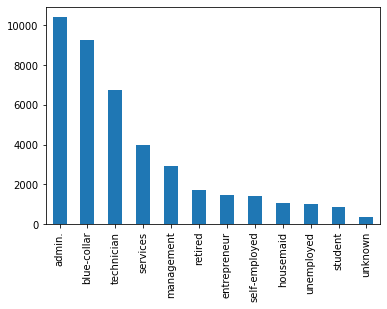

In [12]:
#Job status
job_count = data['job'].value_counts()
print(job_count)
job_count.plot.bar()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


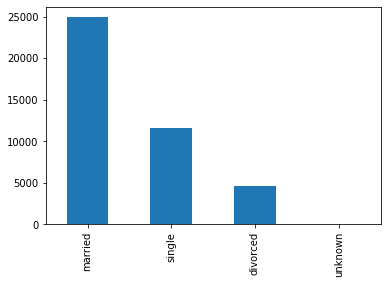

In [13]:
#Marital status
marital_count = data['marital'].value_counts()
print(marital_count)
marital_count.plot.bar()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


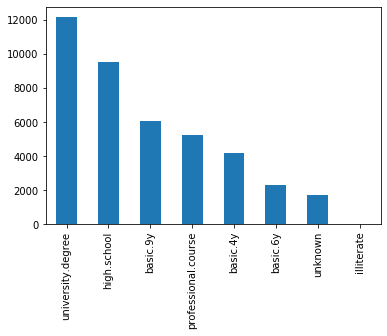

In [14]:
#Education status
education_count = data['education'].value_counts()
print(education_count)
education_count.plot.bar()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64


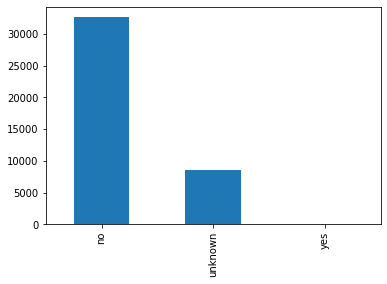

In [15]:
#Credit default status
default_count = data['default'].value_counts()
print(default_count)
default_count.plot.bar()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


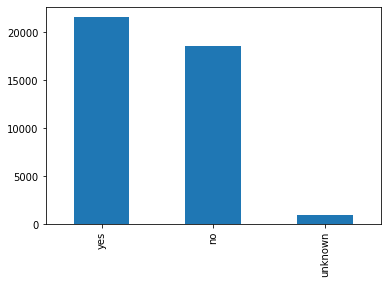

In [16]:
#Housing loan status
housing_count = data['housing'].value_counts()
print(housing_count)
housing_count.plot.bar()

cellular     26144
telephone    15044
Name: contact, dtype: int64


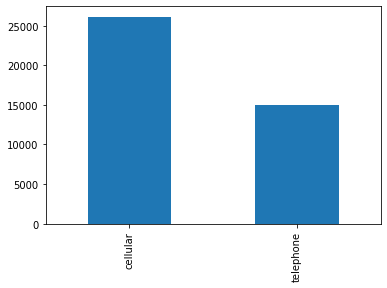

In [17]:
#Type of contact status
contact_count = data['contact'].value_counts()
print(contact_count)
contact_count.plot.bar()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64


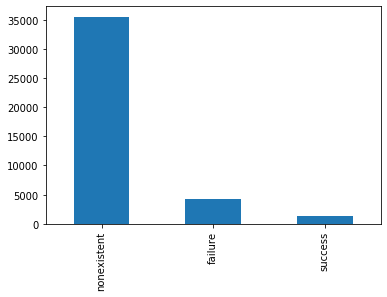

In [18]:
#Outcome of the previous marketing campaign status
poutcome_count = data['poutcome'].value_counts()
print(poutcome_count)
poutcome_count.plot.bar()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64


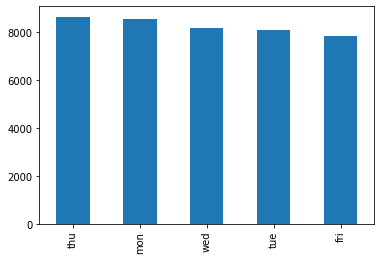

In [19]:
#Day of week count
day_of_week_count = data['day_of_week'].value_counts()
print(day_of_week_count)
day_of_week_count.plot.bar()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64


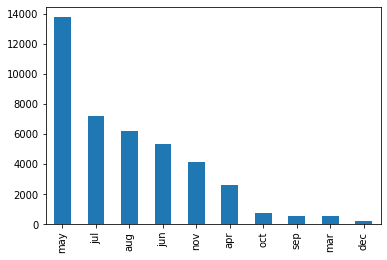

In [20]:
#Month count
month_count = data['month'].value_counts()
print(month_count)
month_count.plot.bar()

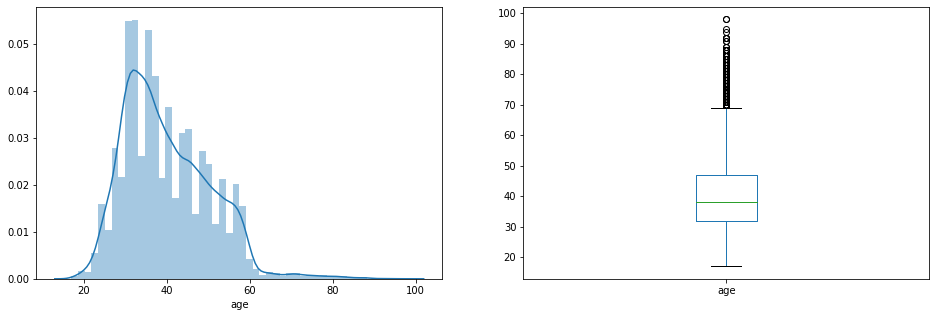

In [21]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['age']);

plt.subplot(122)
data['age'].plot.box(figsize=(16,5))

plt.show()

# Biivariate Analysis

In [22]:
data1 = data[data['y'] == 'yes']
data2 = data[data['y'] == 'no']

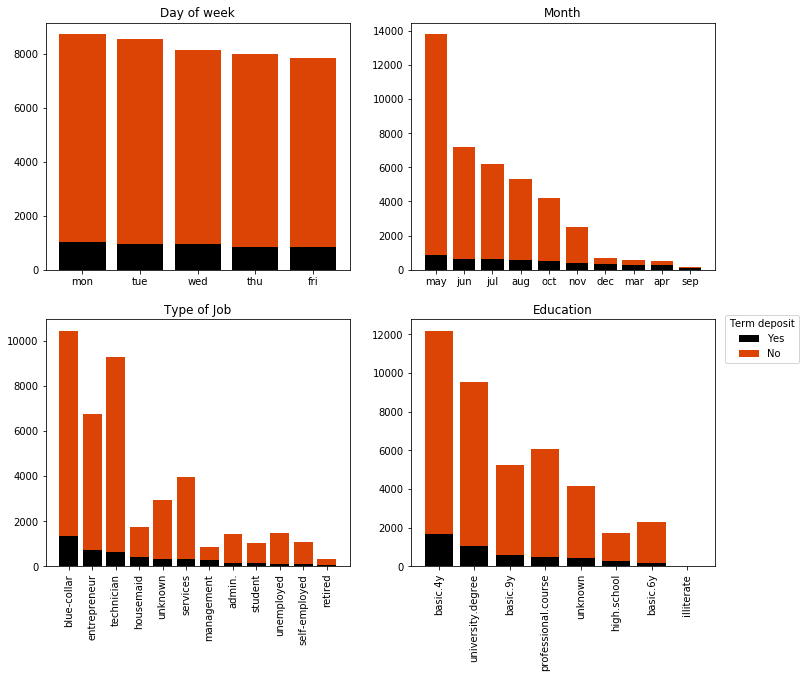

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))

b1 = ax[0, 0].bar(data1['day_of_week'].unique(),height = data1['day_of_week'].value_counts(),color='#000000')
b2 = ax[0, 0].bar(data2['day_of_week'].unique(),height = data2['day_of_week'].value_counts(),bottom = data1['day_of_week'].value_counts(),color = '#DC4405') 
ax[0, 0].title.set_text('Day of week')
#ax[0, 0].legend((b1[0], b2[0]), ('Yes', 'No'))
ax[0, 1].bar(data1['month'].unique(),height = data1['month'].value_counts(),color='#000000')
ax[0, 1].bar(data2['month'].unique(),height = data2['month'].value_counts(),bottom = data1['month'].value_counts(),color = '#DC4405') 
ax[0, 1].title.set_text('Month')
ax[1, 0].bar(data1['job'].unique(),height = data1['job'].value_counts(),color='#000000')
ax[1, 0].bar(data1['job'].unique(),height = data2['job'].value_counts()[data1['job'].value_counts().index],bottom = data1['job'].value_counts(),color = '#DC4405') 
ax[1, 0].title.set_text('Type of Job')
ax[1, 0].tick_params(axis='x',rotation=90)
ax[1, 1].bar(data1['education'].unique(),height = data1['education'].value_counts(),color='#000000') #row=0, col=1
ax[1, 1].bar(data1['education'].unique(),height = data2['education'].value_counts()[data1['education'].value_counts().index],bottom = data1['education'].value_counts(),color = '#DC4405') 
ax[1, 1].title.set_text('Education')
ax[1, 1].tick_params(axis='x',rotation=90)
#ax[0, 1].xticks(rotation=90)
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

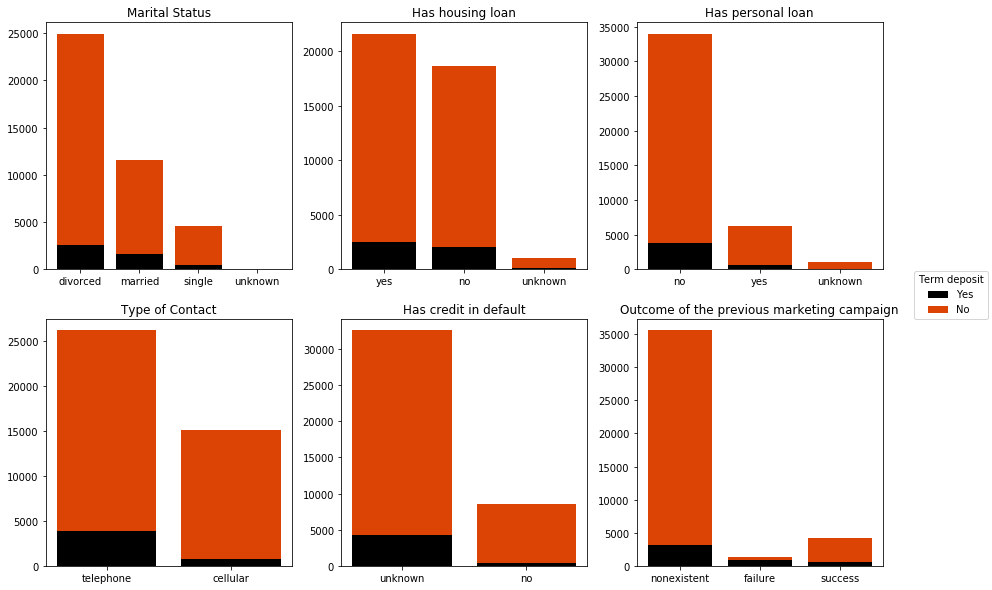

In [24]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))

b1 = ax[0, 0].bar(data1['marital'].unique(),height = data1['marital'].value_counts(),color='#000000')
b2 = ax[0, 0].bar(data1['marital'].unique(),height = data2['marital'].value_counts()[data1['marital'].value_counts().index],bottom = data1['marital'].value_counts(),color = '#DC4405') 
ax[0, 0].title.set_text('Marital Status')
#ax[0, 0].legend((b1[0], b2[0]), ('Yes', 'No'))
ax[0, 1].bar(data1['housing'].unique(),height = data1['housing'].value_counts(),color='#000000')
ax[0, 1].bar(data1['housing'].unique(),height = data2['housing'].value_counts()[data1['housing'].value_counts().index],bottom = data1['housing'].value_counts(),color = '#DC4405') 
ax[0, 1].title.set_text('Has housing loan')
ax[0, 2].bar(data1['loan'].unique(),height = data1['loan'].value_counts(),color='#000000')
ax[0, 2].bar(data1['loan'].unique(),height = data2['loan'].value_counts()[data1['loan'].value_counts().index],bottom = data1['loan'].value_counts(),color = '#DC4405') 
ax[0, 2].title.set_text('Has personal loan')
ax[1, 0].bar(data1['contact'].unique(),height = data1['contact'].value_counts(),color='#000000')
ax[1, 0].bar(data1['contact'].unique(),height = data2['contact'].value_counts()[data1['contact'].value_counts().index],bottom = data1['contact'].value_counts(),color = '#DC4405') 
ax[1, 0].title.set_text('Type of Contact')
ax[1, 1].bar(data1['default'].unique(),height = data1['default'].value_counts(),color='#000000')
ax[1, 1].bar(data1['default'].unique(),height = data2['default'].value_counts()[data1['default'].value_counts().index],bottom = data1['default'].value_counts(),color = '#DC4405') 
ax[1, 1].title.set_text('Has credit in default')
ax[1, 2].bar(data1['poutcome'].unique(),height = data1['poutcome'].value_counts(),color='#000000')
ax[1, 2].bar(data1['poutcome'].unique(),height = data2['poutcome'].value_counts()[data1['poutcome'].value_counts().index],bottom = data1['poutcome'].value_counts(),color = '#DC4405') 
ax[1, 2].title.set_text('Outcome of the previous marketing campaign')
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

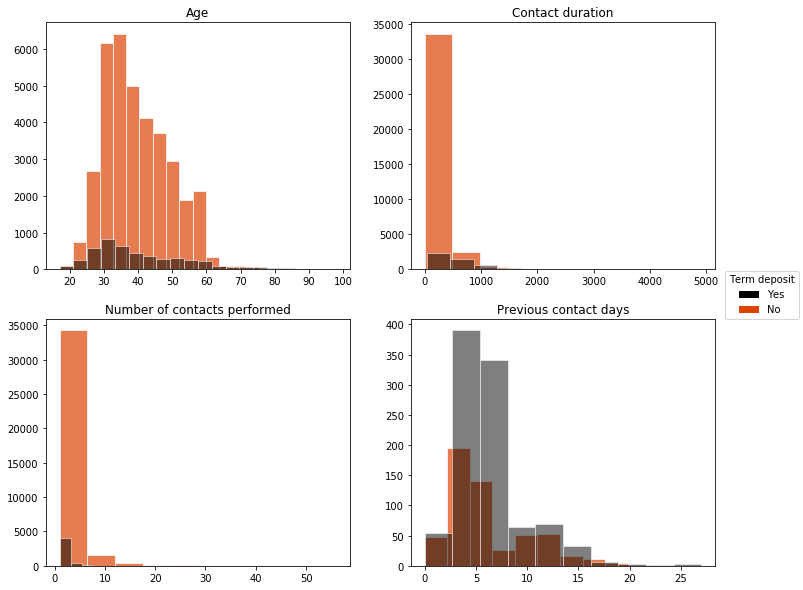

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))

ax[0, 0].hist(data2['age'],color = '#DC4405',alpha=0.7,bins=20, edgecolor='white') 
ax[0, 0].hist(data1['age'],color='#000000',alpha=0.5,bins=20, edgecolor='white')
ax[0, 0].title.set_text('Age')
ax[0, 1].hist(data2['duration'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[0, 1].hist(data1['duration'],color='#000000',alpha=0.5, edgecolor='white')
ax[0, 1].title.set_text('Contact duration')
ax[1, 0].hist(data2['campaign'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[1, 0].hist(data1['campaign'],color='#000000',alpha=0.5, edgecolor='white')
ax[1, 0].title.set_text('Number of contacts performed')
ax[1, 1].hist(data2[data2['pdays'] != 999]['pdays'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[1, 1].hist(data1[data1['pdays'] != 999]['pdays'],color='#000000',alpha=0.5, edgecolor='white')
ax[1, 1].title.set_text('Previous contact days')
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

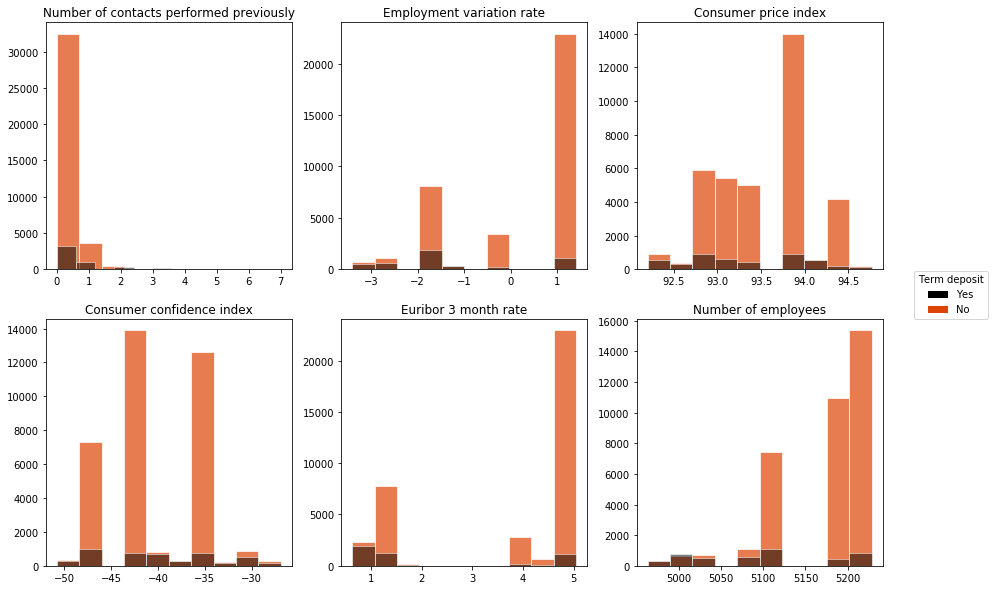

In [26]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))
ax[0, 0].hist(data2['previous'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[0, 0].hist(data1['previous'],color='#000000',alpha=0.5, edgecolor='white')
ax[0, 0].title.set_text('Number of contacts performed previously')
ax[0, 1].hist(data2['emp.var.rate'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[0, 1].hist(data1['emp.var.rate'],color='#000000',alpha=0.5, edgecolor='white')
ax[0, 1].title.set_text('Employment variation rate')
ax[0, 2].hist(data2['cons.price.idx'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[0, 2].hist(data1['cons.price.idx'],color='#000000',alpha=0.5, edgecolor='white')
ax[0, 2].title.set_text('Consumer price index')
ax[1, 0].hist(data2['cons.conf.idx'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[1, 0].hist(data1['cons.conf.idx'],color='#000000',alpha=0.5, edgecolor='white')
ax[1, 0].title.set_text('Consumer confidence index')
ax[1, 1].hist(data2['euribor3m'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[1, 1].hist(data1['euribor3m'],color='#000000',alpha=0.5, edgecolor='white')
ax[1, 1].title.set_text('Euribor 3 month rate')
ax[1, 2].hist(data2['nr.employed'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[1, 2].hist(data1['nr.employed'],color='#000000',alpha=0.5, edgecolor='white')
ax[1, 2].title.set_text('Number of employees')
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

# Create Dummies

In [27]:
predictors = data.iloc[:,0:20]
predictors = predictors.drop(['pdays'],axis=1)
y = data.iloc[:,20]
X = pd.get_dummies(predictors)

In [28]:
X.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


# Treating Imbalanced Data

In [29]:
y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [30]:
sm = SMOTE(random_state=0)
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)
pd.Series(y_SMOTE).value_counts()

no     36548
yes    36548
Name: y, dtype: int64

# Train Test Split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [32]:
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)

# Decision Tree 

In [33]:
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=7)

In [34]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [35]:
predictions = dtree.predict(X_test)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          no       0.95      0.96      0.95     10944
         yes       0.64      0.59      0.61      1413

    accuracy                           0.91     12357
   macro avg       0.79      0.77      0.78     12357
weighted avg       0.91      0.91      0.91     12357



In [38]:
model = dtree.fit(X_SMOTE,y_SMOTE)

In [39]:
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          no       0.98      0.87      0.92     10944
         yes       0.46      0.84      0.60      1413

    accuracy                           0.87     12357
   macro avg       0.72      0.86      0.76     12357
weighted avg       0.92      0.87      0.89     12357



# Random Forest

In [40]:
rfc = RandomForestClassifier(n_estimators=600)

In [41]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          no       0.93      0.97      0.95     10944
         yes       0.66      0.47      0.55      1413

    accuracy                           0.91     12357
   macro avg       0.80      0.72      0.75     12357
weighted avg       0.90      0.91      0.90     12357



In [44]:
model = rfc.fit(X_SMOTE,y_SMOTE)

In [45]:
predictions = model.predict(X_test)

In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          no       0.94      0.96      0.95     10944
         yes       0.63      0.52      0.57      1413

    accuracy                           0.91     12357
   macro avg       0.78      0.74      0.76     12357
weighted avg       0.90      0.91      0.91     12357



# Logistic regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [49]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

/Users/kranti4871/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
y_pred=logreg.predict(X_test)

In [52]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[10623   321]
 [  829   584]]


In [54]:
from sklearn import metrics

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.93      0.97      0.95     10944
         yes       0.65      0.41      0.50      1413

    accuracy                           0.91     12357
   macro avg       0.79      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



In [57]:
#After Applying SMOTE

In [58]:
logreg.fit(X_SMOTE,y_SMOTE)

/Users/kranti4871/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
y_pred=logreg.predict(X_test)

In [60]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[10139   805]
 [  590   823]]


In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.95      0.93      0.94     10944
         yes       0.51      0.58      0.54      1413

    accuracy                           0.89     12357
   macro avg       0.73      0.75      0.74     12357
weighted avg       0.89      0.89      0.89     12357

